In [1]:
import pandas as pd

# Read x_train.txt
X = pd.read_csv('../data/x_train.txt', sep=' ', header=None)

# Read y_train.txt
y = pd.read_csv('../data/y_train.txt', sep=' ', header=None)


# Display the data
print("x:")
print(X.head())

print("\ny:")
print(y.head())


x:
        0         1         2         3         4         5         6    \
0 -2.619773 -2.619533 -1.199350 -1.083335 -1.000910 -0.366967 -2.164037   
1 -1.415579 -1.782544 -2.880270 -1.958863  1.159968  0.273030 -1.628728   
2 -2.745092 -1.382945 -1.626015 -1.282560 -0.663146  0.052349 -2.403322   
3  0.618998  0.455364 -0.115081  0.649040 -0.862207  2.308504  0.526114   
4 -0.070694 -0.550509 -0.565556 -0.693065 -0.573089 -0.395862  0.003170   

        7         8         9    ...        490        491        492  \
0 -1.210001 -0.658311 -1.489539  ...  10.849925  10.343346  10.717519   
1 -0.175813 -0.916857 -0.570166  ...  11.489417   5.195818   3.494627   
2 -0.765073 -0.394354 -0.806624  ...  13.934934   9.267515   4.705604   
3 -1.094852  1.088656 -0.481210  ...  12.021328   3.852231  11.059702   
4 -0.981609 -0.505775 -0.758430  ...   7.537788  11.229665  11.318915   

        493        494        495        496        497        498        499  
0  7.709295   5.894554  12.

In [10]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import ast

# Function to train the model and calculate custom score
def train_and_evaluate_model(config, X, y):
    vars = ast.literal_eval(config['colset'])
    Xloc = X[vars]
    
    # Split data into training and validation sets without a fixed random seed
    X_train, X_val, y_train, y_val = train_test_split(Xloc, y, test_size=0.2)
    
    # Create the model
    model = GaussianNB()
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict probabilities on the validation set
    if hasattr(model, 'predict_proba'):
        preds_proba = model.predict_proba(X_val)[:, 1]
    else:
        preds_proba = model.decision_function(X_val)
    
    # Get the indices of the top 20% predictions
    top_20_percent_indices = np.argsort(preds_proba)[-int(0.2 * len(preds_proba)):]

    # Select the corresponding true labels and predicted labels for top 20%
    top_20_true = y_val.iloc[top_20_percent_indices].values
    top_20_preds = (preds_proba[top_20_percent_indices] >= 0.5).astype(int)
    
    # Calculate the number of correct class 1 predictions
    correct_class_1_predictions = sum(1 for true, pred in zip(top_20_true, top_20_preds) if true == 1 and pred == 1)
    
    # Calculate the number of features used
    num_features_used = Xloc.shape[1]

    # Scaled score calculation
    customer_scaled = (correct_class_1_predictions / len(top_20_preds)) * 1000
    customer_gain = 10 * customer_scaled
    variable_cost = 200 * num_features_used
    custom_score = customer_gain - variable_cost

    return custom_score

# Load the results from the CSV file
#results = pd.read_csv('results.csv')

df_e1 = pd.read_csv('ensemble1-raytune-bohb.csv')
df_e2 = pd.read_csv('ensemble2-raytune-bohb.csv')
df_xgb= pd.read_csv('xgb-raytune-bohb.csv')
df_rf = pd.read_csv('rf-raytune_bohb.csv')
df_nb = pd.read_csv('nb-raytune_bohb.csv')

# Initialize a list to store the results
comparison_results = []

# Number of iterations for resampling and evaluating
n_iterations = 200

# Define the models and ensembles to compare
colsets=[
    '[101, 102, 103, 105]', '[101, 102, 103]', '[101, 102, 105]', '[101, 103, 105]', 
    '[102, 103, 105]', '[104, 102, 103, 105]', '[100, 101, 102, 103, 105]', '[100, 101, 102, 103]', 
    '[100, 101, 102, 105]', '[100, 101, 103, 105]', '[100, 102, 103, 105]', '[100, 104, 102, 103, 105]', 
    '[100, 101, 102, 103, 104, 105]'
]

# Run the loop for the specified number of iterations
for i in range(n_iterations):

    for colset in colsets:
        config = {
        "colset": colset
        }
    
        # Train and evaluate the model
        custom_score = train_and_evaluate_model(config, X, y)
        
        # Append the results to the list
        comparison_results.append({
            'custom_score': custom_score,
            'colset': colset,
            'iteration': i + 1
        })

# Convert the results to a DataFrame
comparison_df = pd.DataFrame(comparison_results)

# Save the comparison results to a CSV file
comparison_df.to_csv('comparison_results_nb.csv', index=False)

# Display the comparison results
print(comparison_df)


d:\mgr\aml\pr2\venv\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\mgr\aml\pr2\venv\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\mgr\aml\pr2\venv\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\mgr\aml\pr2\venv\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

      custom_score                          colset  iteration
0           7250.0            [101, 102, 103, 105]          1
1           7250.0                 [101, 102, 103]          1
2           6800.0                 [101, 102, 105]          1
3           6850.0                 [101, 103, 105]          1
4           7150.0                 [102, 103, 105]          1
...            ...                             ...        ...
2595        6850.0            [100, 101, 102, 105]        200
2596        7200.0            [100, 101, 103, 105]        200
2597        6750.0            [100, 102, 103, 105]        200
2598        7000.0       [100, 104, 102, 103, 105]        200
2599        6950.0  [100, 101, 102, 103, 104, 105]        200

[2600 rows x 3 columns]


d:\mgr\aml\pr2\venv\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\mgr\aml\pr2\venv\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\mgr\aml\pr2\venv\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\mgr\aml\pr2\venv\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

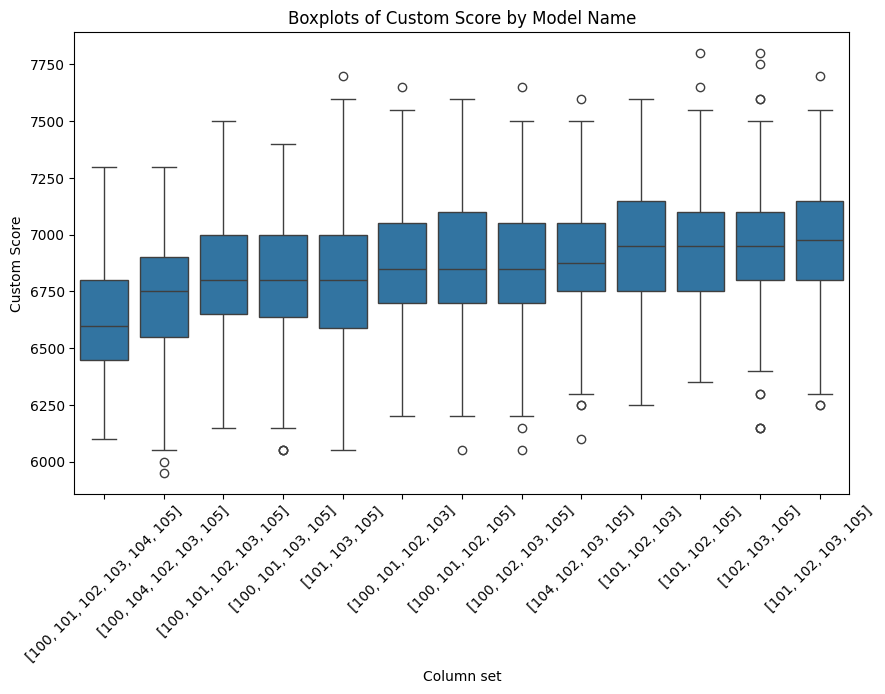

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group the data by 'model_name' and calculate the custom_score median
grouped_data = comparison_df.groupby('colset')['custom_score'].median().reset_index()

# Sort the data by median custom_score
sorted_data = grouped_data.sort_values('custom_score')

# Plot the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=comparison_df, x='colset', y='custom_score', order=sorted_data['colset'])
plt.xlabel('Column set')
plt.ylabel('Custom Score')
plt.title('Boxplots of Custom Score by Model Name')
plt.xticks(rotation=45)
plt.show()